## HDBSCAN Clustering

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import hdbscan


from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from IPython.display  import display_html
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table', 'table style = "display:inline"'), raw=True)

`Loading data`

In [4]:

digits = load_digits()

In [5]:
data = digits.data


### Dimensionality reduction

We are using TSNE to reduce the 64 dimensions of our dataset to 2 in order to be able to visualize it.

In [6]:
data_embedded = TSNE(n_components = 2, random_state=0).fit_transform(data)

In [7]:
df = pd.DataFrame(data_embedded, columns = ['x','y'])

In [8]:
df['label']= digits.target

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


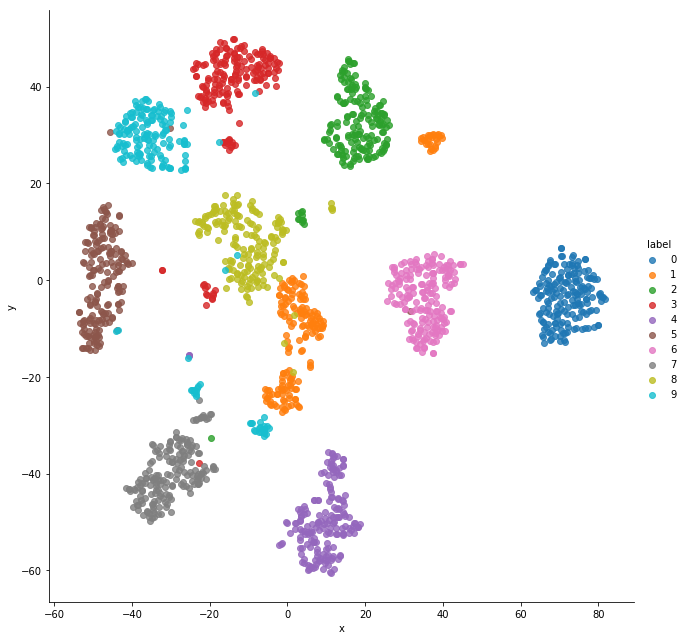

In [9]:
sns.lmplot(x= 'x',y= 'y', data= df, fit_reg = False,size=9,hue='label')

From the above figue we have about 10 clusters with some labels misclassified. 

### Clustering the data with HDBSCAN with min_cluster_size =30 and varying min_sample parameter


In [17]:
labels_lsts =[]
for l in range(1,11):
    clusterer_= hdbscan.HDBSCAN(min_cluster_size=30, min_samples=l)
    clusterer_.fit(digits.data)
    labels_lsts.append(clusterer_.labels_)

## Checking the results

In [22]:
display_side_by_side((pd.crosstab(labels_lsts[0],digits.target)),(pd.crosstab(labels_lsts[1],digits.target)),
                     (pd.crosstab(labels_lsts[2],digits.target)),pd.crosstab(labels_lsts[3],digits.target),
                     pd.crosstab(labels_lsts[4],digits.target),pd.crosstab(labels_lsts[5],digits.target),
                    pd.crosstab(labels_lsts[6],digits.target),pd.crosstab(labels_lsts[7],digits.target),
                     pd.crosstab(labels_lsts[8],digits.target),pd.crosstab(labels_lsts[9],digits.target))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
-1,0,37,13,46,14,45,9,19,142,61
0,0,0,0,0,0,0,0,160,1,0
1,178,0,0,0,0,0,0,0,0,0
2,0,0,164,0,0,0,0,0,0,0
3,0,0,0,0,167,0,0,0,0,0
4,0,0,0,137,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,119
6,0,0,0,0,0,78,0,0,0,0
7,0,0,0,0,0,58,0,0,0,0


From the tables, we observed that most of the data points for label 8 were classified as noise. The algorithm performs well withh clustering the other labels. We conlude that as i increase the min_sample parameter, most of the data are decleared as noise and we get smaller cluster groups as well.

### Clustering the data with HDBSCAN with min_cluster_size =40 and varying min_sample parameter


In [10]:
labels_lst =[]
for k in range(1,11):
    clusterer= hdbscan.HDBSCAN(min_cluster_size=40, min_samples=k)
    clusterer.fit(digits.data)
    labels_lst.append(clusterer.labels_)

## Checking the result

In [16]:
display_side_by_side((pd.crosstab(labels_lst[0],digits.target)),(pd.crosstab(labels_lst[1],digits.target)),
                     (pd.crosstab(labels_lst[2],digits.target)),pd.crosstab(labels_lst[3],digits.target),
                     pd.crosstab(labels_lst[4],digits.target),pd.crosstab(labels_lst[5],digits.target),
                    pd.crosstab(labels_lst[6],digits.target),pd.crosstab(labels_lst[7],digits.target),
                     pd.crosstab(labels_lst[8],digits.target),pd.crosstab(labels_lst[9],digits.target))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
-1,0,37,13,46,14,26,9,19,142,61
0,0,0,0,0,0,0,0,160,1,0
1,178,0,0,0,0,0,0,0,0,0
2,0,0,164,0,0,0,0,0,0,0
3,0,0,0,0,167,0,0,0,0,0
4,0,0,0,137,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,119
6,0,0,0,0,0,155,0,0,0,0
7,0,0,0,0,0,1,172,0,0,0


From the tables, we observed that most of the data points for label 8 were classified as noise. The algorithm performs well withh clustering the other labels. We conlude that as i increase the min_sample parameter, most of the data are decleared as noise and we get smaller cluster groups as well.

$\textbf{ Finally, after carefully analysis from the results above, I choose the min_cluster= 40 and min_sample = 1.}$

In [27]:
fin_clusterer= hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1)
fin_clusterer.fit(digits.data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=40, min_samples=1, p=None,
    prediction_data=False)

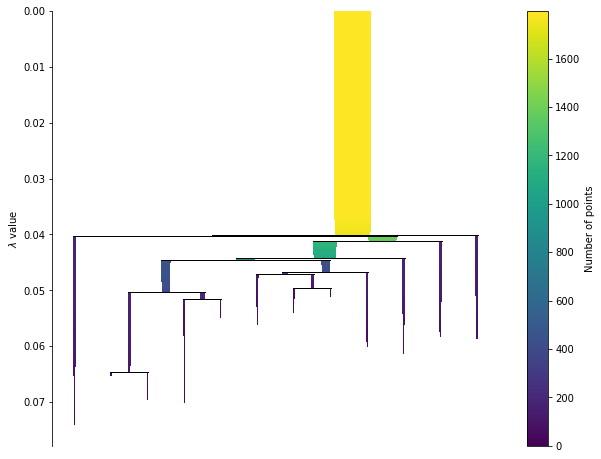

In [35]:
plt.figure(figsize=(10,8))
fin_clusterer.condensed_tree_.plot()

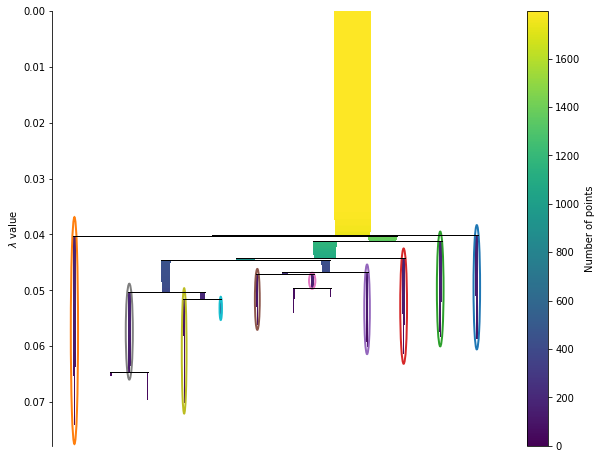

In [36]:
plt.figure(figsize=(10,8))
fin_clusterer.condensed_tree_.plot(select_clusters= True, selection_palette = sns.color_palette())

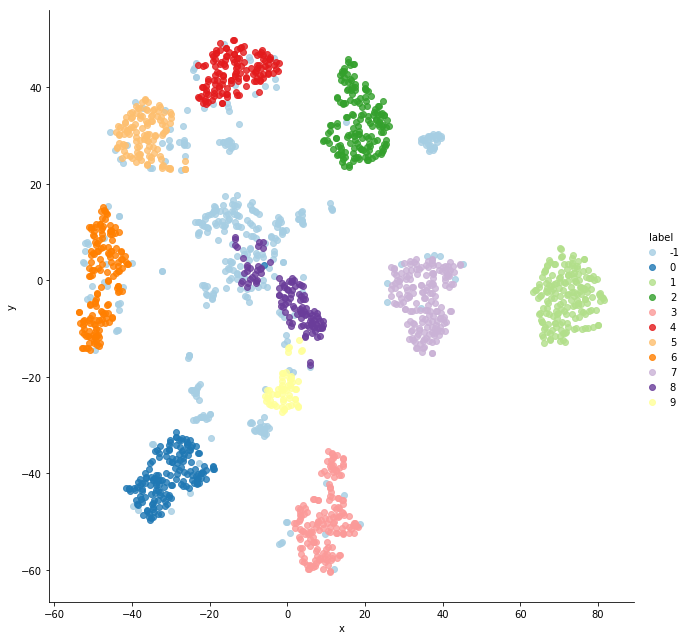

In [39]:
new_df =  pd.DataFrame(data_embedded, columns = ['x','y'])
new_df['label']= fin_clusterer.labels_
color_palette = sns.color_palette('Paired', fin_clusterer.labels_.max()+2)
sns.lmplot(x= 'x',y= 'y', data= new_df, fit_reg = False,size=9,hue='label', palette=color_palette)

From our classifier we get 10 clusters.